### Can we detect fraud with Insurance Claims?
- This data set came from: https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/4954928053318020/1058911316420443/167703932442645/latest.html

### Goals:
- Compare and compete various classification algorithms 
    - Identify pros and cons of algorithms for this data set
    - accuracy vs. precision vs. recall trade-offs of each
    - show the roc curve.
    - identify important features

#### Resources and more info
    - Encoding Categorical data: http://pbpython.com/categorical-encoding.html
    - 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sn

In [2]:
# import the data set
df = pd.DataFrame.from_csv("dataset/insurance_claims.csv")
df= df.reset_index(drop=True)
df = df.drop(['_c39'], axis=1)

/Users/michaelwoline/anaconda2/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


In [3]:
df.describe()

,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date                  1000 non-null object
incident_type   

In [5]:
df.tail(15)

,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
985,32,669809,2002-04-05,OH,100/300,1000,1722.50,0,453713,MALE,...,2,?,76900,7690,7690,61520,Jeep,Wrangler,1995,N
986,42,182953,2013-04-30,IN,100/300,500,944.03,0,440153,MALE,...,3,?,77000,15400,7700,53900,Toyota,Highlander,2015,Y
987,39,836349,2013-05-01,IL,500/1000,2000,1453.61,4000000,619570,MALE,...,3,?,60320,9280,9280,41760,Chevrolet,Tahoe,2012,Y
988,46,591269,1999-01-09,IN,100/300,500,1672.88,0,478947,FEMALE,...,1,NO,60700,12140,6070,42490,Honda,Civic,1997,N
989,21,550127,2007-07-04,IN,250/500,1000,1248.05,0,443550,FEMALE,...,2,?,53280,5920,0,47360,Chevrolet,Malibu,2015,N
990,43,663190,1994-02-05,IL,100/300,500,1564.43,3000000,477644,FEMALE,...,2,YES,34290,3810,3810,26670,Jeep,Grand Cherokee,2013,N
991,44,109392,2006-07-12,OH,100/300,1000,1280.88,0,433981,MALE,...,1,NO,46980,0,5220,41760,Accura,TL,2002,N
992,26,215278,2007-10-24,IN,100/300,500,722.66,0,433696,MALE,...,2,YES,36700,3670,7340,25690,Nissan,Pathfinder,2010,N
993,28,674570,2001-12-08,OH,250/500,1000,1235.14,0,443567,MALE,...,1,?,60200,6020,6020,48160,Volkswagen,Passat,2012,N
994,30,681486,2007-03-24,IN,500/1000,1000,1347.04,0,430665,MALE,...,2,YES,6480,540,1080,4860,Honda,Civic,1996,N


In [6]:
#remove these columns from the feature set because each one has a high majority of unique values.
colsToDelete = ["policy_number", "policy_bind_date", "insured_zip", "incident_location", "incident_date"]
filteredColList = [i for i in list(df) if i not in colsToDelete]
cleaned_df = df[filteredColList].copy()
cleaned_df.head(5)

,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [7]:
# transform each categorical string column by replacing the string with a numeric value for faster processing. 
obj_list = list(cleaned_df.select_dtypes(include=['object']))
# print(obj_list)

for col in obj_list:
    cleaned_df[col] = cleaned_df[col].astype('category')
    cleaned_df[col +'_coded'] = cleaned_df[col].cat.codes
    print(col+'_coded')
cleaned_df.head()


policy_state_coded
policy_csl_coded
insured_sex_coded
insured_education_level_coded
insured_occupation_coded
insured_hobbies_coded
insured_relationship_coded
incident_type_coded
collision_type_coded
incident_severity_coded
authorities_contacted_coded
incident_state_coded
incident_city_coded
property_damage_coded
police_report_available_coded
auto_make_coded
auto_model_coded
fraud_reported_coded


,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,collision_type_coded,incident_severity_coded,authorities_contacted_coded,incident_state_coded,incident_city_coded,property_damage_coded,police_report_available_coded,auto_make_coded,auto_model_coded,fraud_reported_coded
0,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,...,3,0,4,4,1,2,2,10,1,1
1,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,...,0,1,4,5,5,0,0,8,12,1
2,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,...,2,1,4,1,1,1,1,4,30,0
3,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,...,1,0,4,2,0,0,1,3,34,1
4,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,...,0,1,2,1,0,1,1,0,31,0


In [8]:
## Now extract the column names with numeric values which includes categorized data converted to numeric values. 
cleaned_data_list = list(cleaned_df.select_dtypes(include=['int64', 'int8','float64']).columns)


### First up Random Forest Classification

In [9]:
# Importing the dataset
X = cleaned_df[cleaned_data_list[0:-1]].values
y = cleaned_df.fraud_reported_coded.values

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


recall


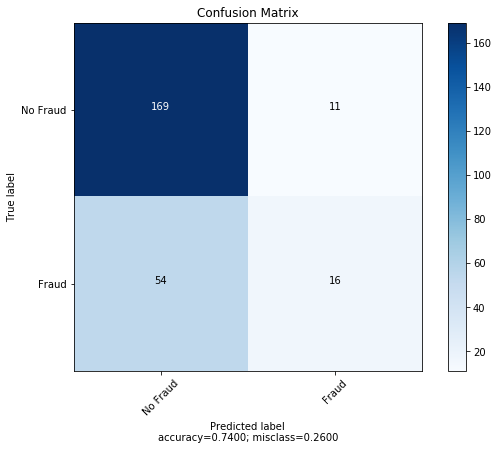

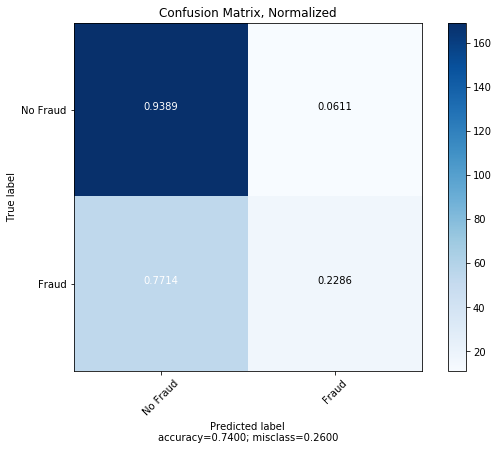

In [14]:
# Fitting random forest classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = 0)
classifier.score = "recall"
classifier.fit(X_train, y_train)
print(classifier.score)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm           = cm,
                      normalize    = False,
                      target_names = ['No Fraud', 'Fraud'],
                      title        = "Confusion Matrix")

plot_confusion_matrix(cm           = cm,
                      normalize    = True,
                      target_names = ['No Fraud', 'Fraud'],
                      title        = "Confusion Matrix, Normalized")




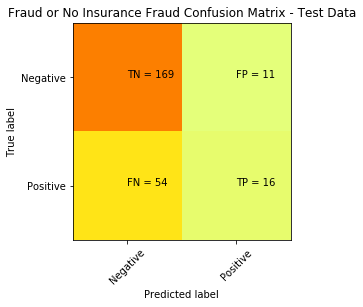

In [15]:
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Fraud or No Insurance Fraud Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))

In [16]:
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=int8), array([180,  70]))

In [17]:
# Precision and Recall
from sklearn.metrics import precision_score, recall_score
precision_scr = precision_score(y_test, y_pred) 
recall_scr = recall_score(y_test, y_pred) 
print(precision_scr, recall_scr)

0.5925925925925926 0.22857142857142856


In [18]:
#Now fit the model to output 
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.metrics import make_scorer, recall_score, accuracy_score, precision_score


In [89]:
clf = RandomForestClassifier()

# param_grid = {
#     'min_samples_split': [2, 3, 5, 15], 
#     'n_estimators' : [30, 100, 300],
#     'max_depth': [3, 5, 15, 25, 40],
#     'max_features': [2, 3, 5, 7, 10, 15]
# }
param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15, 45],
    'max_features': [3, 5, 10, 32]
}
scorers = {
    'precision': make_scorer('precision'),
    'recall': make_scorer('recall'),
    'accuracy': make_scorer('accuracy')
}

scorers = ['precision', 'recall', 'accuracy']
# scorers = ['recall']

In [90]:
# def grid_search_wrapper(refit_score='precision_score'):

"""
fits a GridSearchCV classifier using refit_score for optimization
prints classifier performance metrics
"""


refit_score= 'recall'
skfolds = StratifiedKFold(n_splits=3, random_state=42)
# skf = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(clf, param_grid,  refit=refit_score,
                       cv=skfolds, return_train_score=True, scoring= scorers, n_jobs=-1)

grid_search.fit(X_train, y_train)

# make the predictions
y_pred = grid_search.predict(X_test)

print('Best params for {}'.format(refit_score))
print(grid_search.best_params_)

# confusion matrix on the test data.
print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
print(pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

cm = confusion_matrix(y_test, y_pred)
#     return grid_search, cm

/Users/michaelwoline/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/michaelwoline/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/michaelwoline/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/michaelwoline/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precisio

/Users/michaelwoline/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/michaelwoline/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/michaelwoline/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/michaelwoline/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precisio

/Users/michaelwoline/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/michaelwoline/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/michaelwoline/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Best params for recall
{'max_depth': 3, 'max_features': 32, 'min_samples_split': 3, 'n_estimators': 300}

Confusion matrix of Random Forest optimized for recall on the test data:
     pred_neg  pred_pos
neg       157        23
pos        15        55


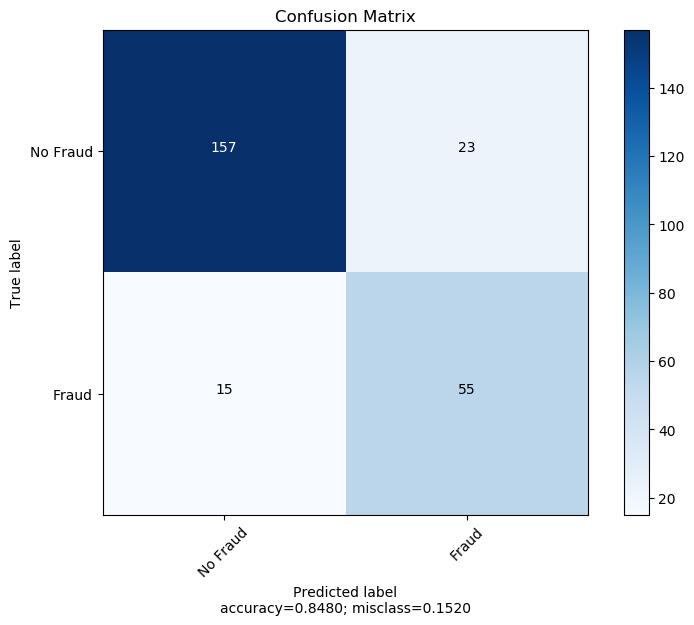

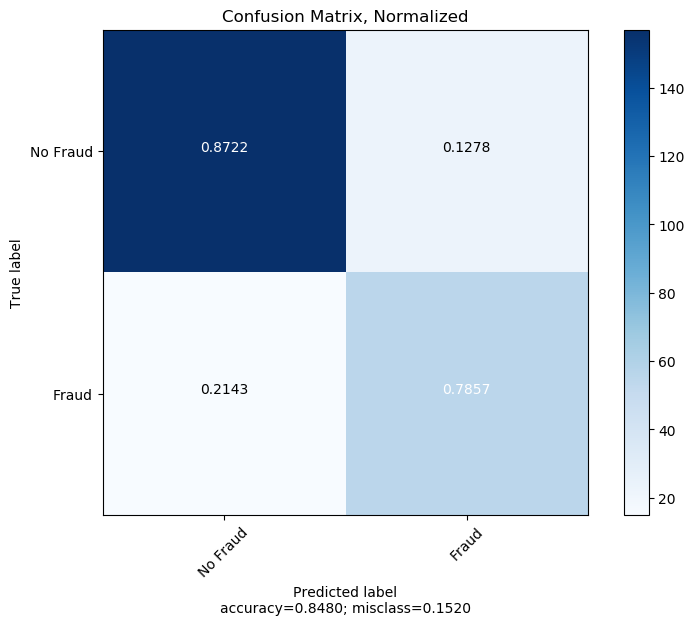

In [91]:
plot_confusion_matrix(cm           = cm,
                      normalize    = False,
                      target_names = ['No Fraud', 'Fraud'],
                      title        = "Confusion Matrix")

plot_confusion_matrix(cm           = cm,
                      normalize    = True,
                      target_names = ['No Fraud', 'Fraud'],
                      title        = "Confusion Matrix, Normalized")


In [95]:
print(grid_search.best_estimator_)
print(grid_search.estimator)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=32, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [96]:
confusion_matrix(y_test, y_pred)

array([[157,  23],
       [ 15,  55]])

In [97]:
precision_scr = precision_score(y_test, y_pred) 
recall_scr = recall_score(y_test, y_pred) 
print(precision_scr)
print(recall_scr)

0.7051282051282052
0.7857142857142857


In [98]:
results = pd.DataFrame(grid_search.cv_results_)
# results = results.sort_values(by='mean_test_precision_score', ascending=False)
# results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score',
#          'param_max_depth', 'param_max_features', 'param_min_samples_split',
#          'param_n_estimators']].head()
results.info()
results

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 42 columns):
mean_fit_time              96 non-null float64
std_fit_time               96 non-null float64
mean_score_time            96 non-null float64
std_score_time             96 non-null float64
param_max_depth            96 non-null object
param_max_features         96 non-null object
param_min_samples_split    96 non-null object
param_n_estimators         96 non-null object
params                     96 non-null object
split0_test_precision      96 non-null float64
split1_test_precision      96 non-null float64
split2_test_precision      96 non-null float64
mean_test_precision        96 non-null float64
std_test_precision         96 non-null float64
rank_test_precision        96 non-null int32
split0_train_precision     96 non-null float64
split1_train_precision     96 non-null float64
split2_train_precision     96 non-null float64
mean_train_precision       96 non-null float64
std_train_p

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_precision,...,split1_test_accuracy,split2_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,mean_train_accuracy,std_train_accuracy
0,0.183294,0.000389,0.092193,0.010959,3,3,3,100,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.000000,...,0.764,0.764,0.764000,0.000000,79,0.764,0.764,0.768,0.765333,1.885618e-03
1,0.750055,0.041672,0.153879,0.038038,3,3,3,300,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.000000,...,0.764,0.764,0.764000,0.000000,79,0.764,0.764,0.764,0.764000,1.110223e-16
2,0.257550,0.035694,0.048548,0.010086,3,3,5,100,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.000000,...,0.764,0.764,0.764000,0.000000,79,0.764,0.764,0.764,0.764000,1.110223e-16
3,0.642149,0.023078,0.142714,0.030114,3,3,5,300,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.000000,...,0.764,0.764,0.764000,0.000000,79,0.764,0.764,0.764,0.764000,1.110223e-16
4,0.217433,0.036524,0.048277,0.008441,3,3,10,100,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.000000,...,0.764,0.764,0.764000,0.000000,79,0.764,0.764,0.764,0.764000,1.110223e-16
5,0.640645,0.033493,0.127437,0.011257,3,3,10,300,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.000000,...,0.764,0.764,0.764000,0.000000,79,0.764,0.764,0.764,0.764000,1.110223e-16
6,0.213210,0.026603,0.041212,0.000892,3,5,3,100,"{'max_depth': 3, 'max_features': 5, 'min_sampl...",0.000000,...,0.764,0.764,0.764000,0.000000,79,0.766,0.776,0.768,0.770000,4.320494e-03
7,0.574073,0.016278,0.103514,0.009389,3,5,3,300,"{'max_depth': 3, 'max_features': 5, 'min_sampl...",0.000000,...,0.764,0.768,0.765333,0.001886,68,0.764,0.764,0.774,0.767333,4.714045e-03
8,0.201066,0.036780,0.034652,0.005390,3,5,5,100,"{'max_depth': 3, 'max_features': 5, 'min_sampl...",1.000000,...,0.764,0.768,0.766667,0.001886,60,0.766,0.774,0.770,0.770000,3.265986e-03
9,0.646652,0.066653,0.168806,0.011906,3,5,5,300,"{'max_depth': 3, 'max_features': 5, 'min_sampl...",0.000000,...,0.764,0.764,0.764000,0.000000,79,0.764,0.764,0.772,0.766667,3.771236e-03


In [99]:
# y_scores_pred_proba = cross_val_predict(clf, X_train, y_train, cv=3, method='predict_proba')
y_scores_pred_proba = grid_search.predict_proba(X_train)

In [100]:
print(len(y_scores_pred_proba[:,1]))
print(len(y_train))

750
750


In [101]:
from sklearn.model_selection import cross_val_predict
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores_pred_proba[:,1])
print(len(thresholds))
print(len(recalls))

250
251


In [102]:
thresholds

array([0.02737646, 0.02762534, 0.02769141, 0.02774608, 0.02802162,
       0.0280699 , 0.02808769, 0.02813597, 0.02839124, 0.02848274,
       0.03104185, 0.03156273, 0.03182332, 0.0324019 , 0.03407337,
       0.03462631, 0.03507087, 0.03655187, 0.03694815, 0.03699643,
       0.03731777, 0.03739271, 0.03740927, 0.03785383, 0.0450554 ,
       0.05088373, 0.0605183 , 0.07094739, 0.08118407, 0.09140924,
       0.09161316, 0.09218793, 0.09375656, 0.09407397, 0.1240294 ,
       0.12559803, 0.14549477, 0.14624384, 0.14699733, 0.14710124,
       0.29725822, 0.4565202 , 0.46460289, 0.46835992, 0.46839243,
       0.47123477, 0.47482017, 0.47737285, 0.47752478, 0.47840686,
       0.47882371, 0.48073235, 0.48112978, 0.48761046, 0.48922523,
       0.49071023, 0.49147564, 0.49212699, 0.49467289, 0.49696648,
       0.50086239, 0.50274361, 0.50302414, 0.50442393, 0.50447988,
       0.50474816, 0.50818343, 0.50844   , 0.50995286, 0.51010461,
       0.5115999 , 0.5133709 , 0.5133789 , 0.51481779, 0.51770

(0, 1)

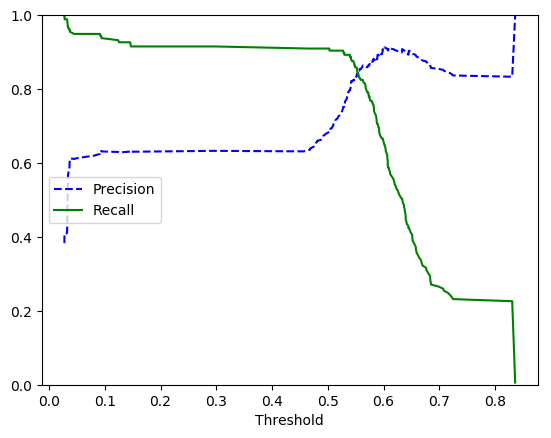

In [103]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="center left")
plt.ylim([0, 1])



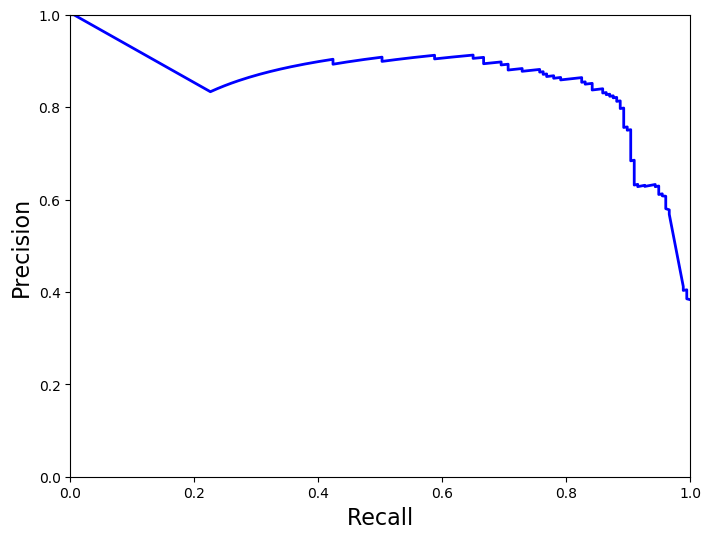

In [104]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)


In [105]:
y_scores_2 = grid_search.predict_proba(X_test)[:,1]

In [106]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

In [107]:
# generate the precision recall curve
p, r, thresholds = precision_recall_curve(y_test, y_scores_2)

(0, 1)

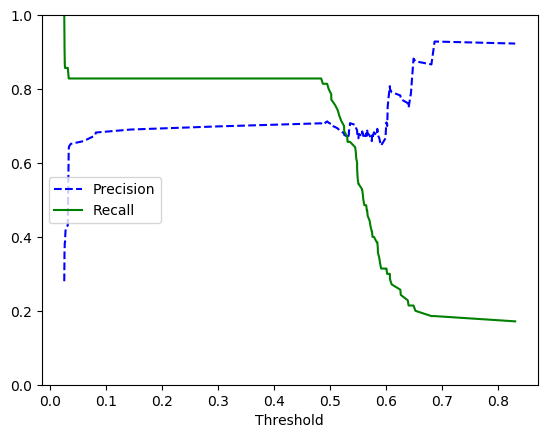

In [108]:
plt.plot(thresholds, p[:-1], "b--", label="Precision")
plt.plot(thresholds, r[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="center left")
plt.ylim([0, 1])


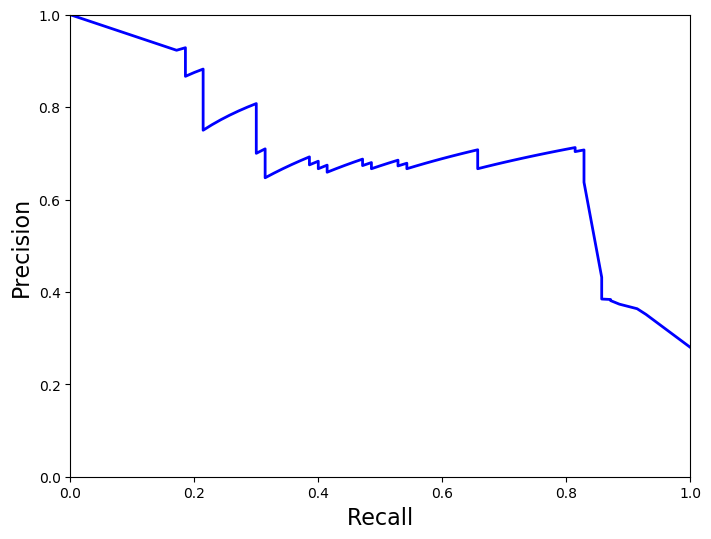

In [109]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(p, r)


In [110]:
def precision_recall_threshold(t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores_2, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)
    
    plot_confusion_matrix(cm       = confusion_matrix(y_test, y_pred_adj),
                      normalize    = True,
                      target_names = ['No Fraud', 'Fraud'],
                      title        = "Confusion Matrix, Normalized")


     pred_neg  pred_pos
neg       156        24
pos        12        58


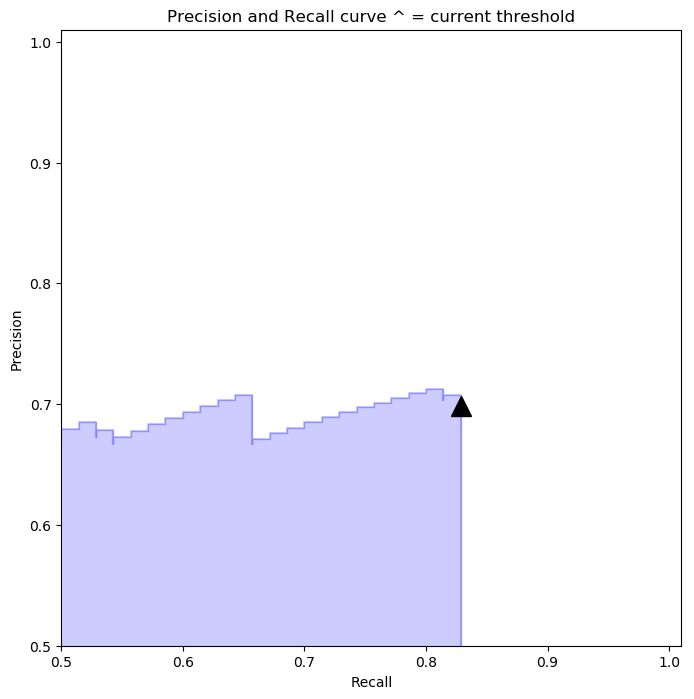

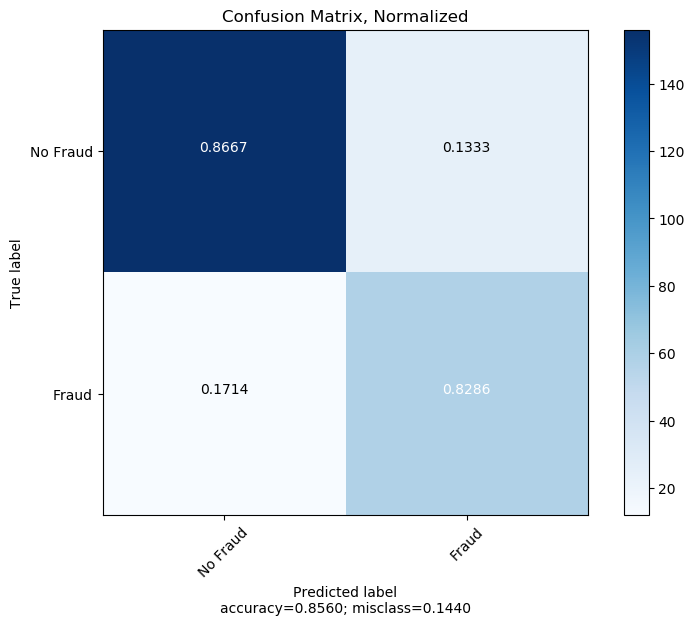

In [111]:
# The best I could do with 1 FN was 0.17, but re-execute to watch the confusion matrix change.
precision_recall_threshold(0.3)

In [112]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

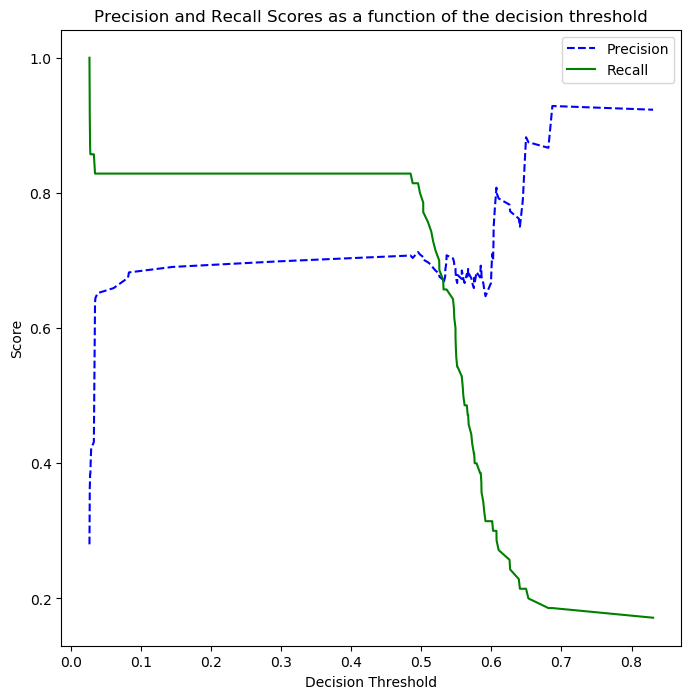

In [113]:
# use the same p, r, thresholds that were previously calculated
plot_precision_recall_vs_threshold(p, r, thresholds)

In [114]:
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

0.8330555555555557


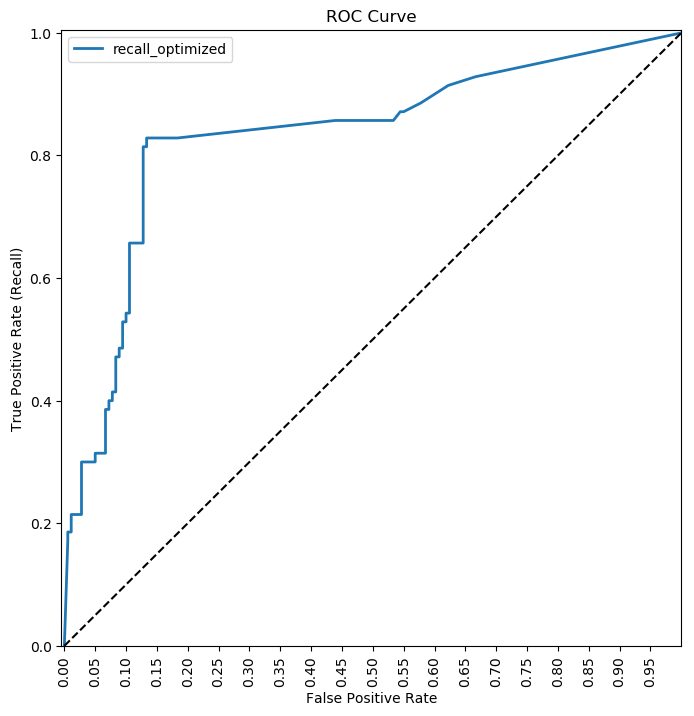

In [115]:
fpr, tpr, auc_thresholds = roc_curve(y_test, y_scores_2)
print(auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

In [116]:
# Precision and Recall
from sklearn.metrics import precision_score, recall_score
precision_scr = precision_score(y_test, y_pred) 
recall_scr = recall_score(y_test, y_pred) 
print("precision= {}, recall= {}".format(precision_scr, recall_scr))

precision= 0.7051282051282052, recall= 0.7857142857142857


In [117]:
cm = confusion_matrix(y_test, y_pred)


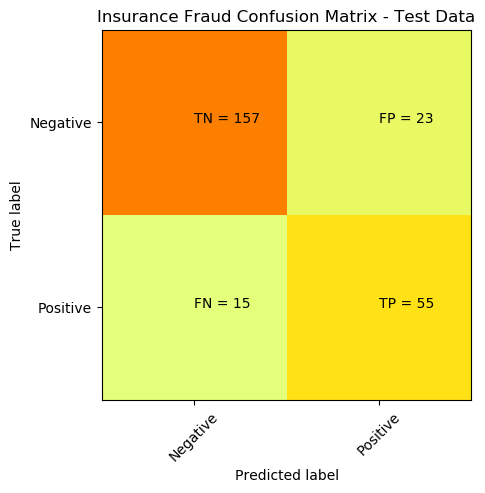

In [118]:
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Insurance Fraud Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))

In [119]:
# grid_search.best_estimator_.feature_importances_

In [120]:
feature_imp_df = pd.DataFrame(sorted(zip(map(lambda x: round(x, 4), \
                    grid_search.best_estimator_.feature_importances_), cleaned_data_list), reverse=True))
feature_imp_df.columns= ["percentage of impact", "feature name"]

In [126]:
feature_imp_df

,percentage of impact,feature name
0,0.4718,incident_severity_coded
1,0.3910,insured_hobbies_coded
2,0.0151,policy_annual_premium
3,0.0143,age
4,0.0129,property_claim
5,0.0106,capital-loss
6,0.0099,insured_occupation_coded
7,0.0073,injury_claim
8,0.0068,incident_state_coded
9,0.0066,incident_hour_of_the_day


Text(0.5,1,'Feature Impact Descending Order')

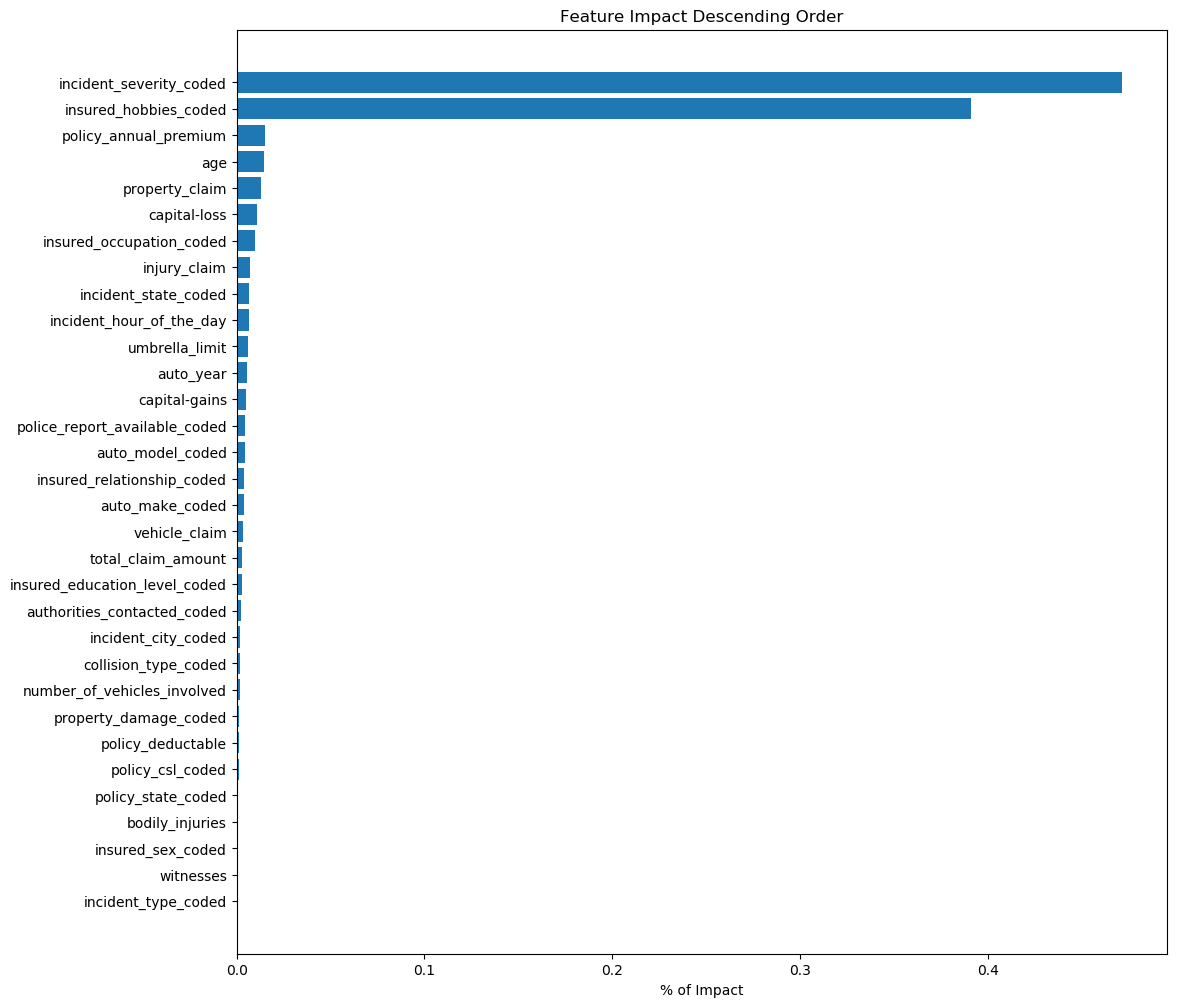

In [134]:
# Plot the features by most important first. 

# plt.rcdefaults()
fig, ax = plt.subplots(figsize = [12,12])

feature_names = feature_imp_df['feature name']
y_pos = np.arange(len(feature_names))

impact_percentage = feature_imp_df['percentage of impact']

ax.barh(y_pos, impact_percentage, align='center', ecolor='black')
ax.tick_params(labelsize=10)
ax.set_yticks(y_pos)
ax.set_yticklabels(feature_names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('% of Impact')
ax.set_title('Feature Impact Descending Order')


In [13]:
# from kaggle site.

import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))


#### Tasks left to add and investigate
1. Convert encoded classification features where multiple labels were converted to numeric but left in the same column from 1 to n into each column with their own category feature by applying onehotencoder? and let each feature be binary.
    - graph and document the change to the recall and precisionn scores when data is changed. 
        - Perform for each clf (classifier)
- add analysis of based on top 5 features to see what the correlation is with those features, for example what hobbies is someone more likely to do and what job and that combo indicates they are more likely to commit insurance fraud.

- Done - Is there any parameter tuning I can add? 
    - increasing the max number of features from 15 to 32, the full feature set, increased by more than 20% the recall score and the precision score was increase as well. 
- Investigate different Cfold CV objects and methods. differences and when to use.
- Why pass list to scoring, when I want to always use recall. 
    - Perhaps graph all 3 different variations.
- Can this be automated with a pipeline object? 
- Clean up and remove duplicate funtionality. 
    - build functions for common tasks. 
- Done - List out features in descending order.
- See if I can graph the importance of the top 3 features. see previous work with scott.
- Graph a visual tree from the forest. https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
- Are there any correlated features? if so, will removing one of them impact the recall and precision percentages?